In [1]:
import pandas as pd
import os
import tqdm
import numpy as np
import pprint
import pickle

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline
import seaborn as sns

In [3]:
data_path = 'mathorcup_recom_listwise/data/'
user_path = 'data_splitted_by_user_id'

In [4]:
if not os.path.exists(data_path + 'userID2idx.pickle'):
    train_df = pd.read_csv(data_path + 'train_data.csv', dtype=str)
    train_userID = set(train_df.loc[:, 'userID'])
    userID2idx = {_: str(i).zfill(7) for i, _ in enumerate(train_userID)}
    with open(data_path + 'userID2idx.pickle', 'wb') as handle:
        pickle.dump(userID2idx, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path + 'userID2idx.pickle', 'rb') as handle:
    userID2idx = pickle.load(handle)
len(userID2idx)

958123

In [5]:
if not os.path.exists(data_path + 'userIdx2ID.pickle'):
    userIdx2ID = dict()
    for k, v in tqdm.tqdm(userID2idx.items()):
        userIdx2ID[v] = k
    with open(data_path + 'userIdx2ID.pickle', 'wb') as handle:
        pickle.dump(userIdx2ID, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path + 'userIdx2ID.pickle', 'rb') as handle:
    userIdx2ID = pickle.load(handle)
len(userIdx2ID)

100%|██████████| 958123/958123 [00:00<00:00, 2533149.40it/s]


958123

In [6]:
userID = '2215314710'
idx = '0000062'
aaa, bb, cc = idx[0:3], idx[3:5], idx[5:7]
df = pd.read_csv('data_splitted_by_user_id/{}/{}/{}.csv'.format(aaa, bb, cc), dtype=str)
df

,Unnamed: 0,userID,requestID,date,time,sequence
0,2823914,2452779740,1226389870_1634960711453_6931,20211023,11,133676259500:0:0;506827267:0:0;506604848:0:0;1...
1,2823915,2452779740,1226389870_1635125364313_6322,20211025,09,133676090616:0:0;506875266:0:0;506788905:0:0;1...
2,5955058,2452779740,1226389870_1634960237640_305,20211023,11,133663542747:0:0;133667887290:0:0;133660240544...
3,5955059,2452779740,1226389870_1635218369566_7408,20211026,11,133671424464:1:304;133672772493:1:129;13365575...
4,5955060,2452779740,1226389870_1635218684065_1630,20211026,11,133675129244:1:97;133649721238:1:39;1336699349...
5,5955061,2452779740,1226389870_1635219225204_5094,20211026,11,133629313711:0:0;507734890:0:0;133680576685:0:...
6,9084050,2452779740,1226389870_1635042614006_1553,20211024,10,133681028177:0:0;507668079:0:0;133679058440:0:...
7,9084051,2452779740,1226389870_1635042785895_9303,20211024,10,133669295443:1:126;133664713509:1:82;133659225...
8,9084052,2452779740,1226389870_1635126996320_5607,20211025,09,507134316:1:56;133668654651:1:134;133677623227...
9,12214735,2452779740,1226389870_1635127074569_8027,20211025,09,133677964514:0:0;507231284:0:0;506949844:0:0;1...


# Calculate Data Length for Each User

In [7]:
# 100%|██████████| 96/96 [08:36<00:00,  5.38s/it]
# 100%|██████████| 96/96 [24:21<00:00, 15.23s/it]
userIDs = [None] * len(userID2idx)
userIdxs = [None] * len(userID2idx)
dataLens = np.zeros(len(userID2idx), dtype=np.int32)
i = 0

for aaa in tqdm.tqdm(os.listdir(user_path)):
    for bb in os.listdir(user_path + '/{}'.format(aaa)):
        for cc in os.listdir(user_path + '/{}/{}'.format(aaa, bb)):
            idx = aaa + bb + cc[:-4]
            userIdxs[i] = idx
            userIDs[i] = userIdx2ID[idx]
            dataLens[i] = sum(1 for line in open('data_splitted_by_user_id/{}/{}/{}'.format(aaa, bb, cc))) - 1
            i += 1

100%|██████████| 96/96 [08:51<00:00,  5.54s/it]


In [8]:
df = pd.DataFrame(
    {'userID': [str(_) for _ in userIDs], 'userIdx': userIdxs, 'dataLen': dataLens},
)
df

,userID,userIdx,dataLen
0,2019831604,0000000,84
1,1396276566,0000001,2
2,2213532200,0000002,23
3,2416202180,0000003,1
4,1627755120,0000004,1
...,...,...,...
958118,2431442310,0958118,2
958119,2215503790,0958119,1
958120,1713745716,0958120,1
958121,1933045852,0958121,2


In [9]:
df.to_csv(data_path + 'dataLen4eachUser' + '.csv', index=False)

[numpy.histogram_bin_edges](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges)

> ‘doane’
An improved version of Sturges’ estimator that works better with non-normal datasets.

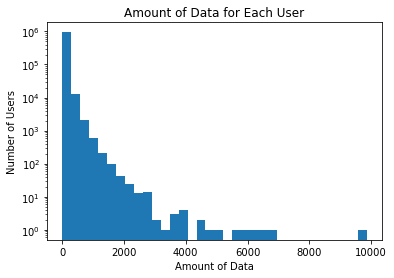

In [10]:
title = 'Amount of Data for Each User'
plt.hist(df.dataLen, bins='doane')
plt.xlabel('Amount of Data')
plt.ylabel('Number of Users')
plt.yscale('log')
plt.title(title)
plt.savefig('images/{}.png'.format(title))

In [11]:
np.where(dataLens == 1)[0].shape

(234333,)

In [12]:
np.where(dataLens == 2)[0].shape

(109116,)

In [13]:
np.where(dataLens == 3)[0].shape

(63965,)

In [14]:
np.where(dataLens == 4)[0].shape

(44344,)

In [15]:
np.where(dataLens == 5)[0].shape

(33700,)

In [16]:
np.mean(dataLens)

32.66693315993876

In [17]:
np.where(dataLens > np.mean(dataLens))[0].shape

(218744,)

# Loyal User Data

In [18]:
loyal_df = df.loc[np.where(dataLens > np.mean(dataLens))[0], :]
loyal_df

,userID,userIdx,dataLen
0,2019831604,0000000,84
11,428614678,0000011,442
13,1370469668,0000013,165
18,2271414200,0000018,221
22,2441160884,0000022,118
...,...,...,...
958111,2436887590,0958111,136
958112,1611848354,0958112,61
958113,2413577186,0958113,127
958114,2417819566,0958114,115


In [19]:
loyal_df.to_csv(data_path + 'dataLen4loyalUser' + '.csv', index=False)

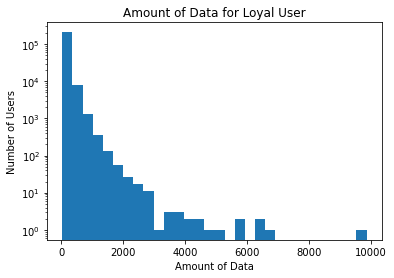

In [20]:
title = 'Amount of Data for Loyal User'
plt.hist(loyal_df.dataLen, bins='doane')
plt.xlabel('Amount of Data')
plt.ylabel('Number of Users')
plt.yscale('log')
plt.title(title)
plt.savefig('images/{}.png'.format(title))

# Augment Loyal User Data

In [21]:
with open(data_path + 'contentTC2ID.pickle', 'rb') as handle:
    contentTC2ID = pickle.load(handle)
with open(data_path + 'contentID2idx.pickle', 'rb') as handle:
    contentID2idx = pickle.load(handle)
with open(data_path + 'key2idx.pickle', 'rb') as handle:
    key2idx = pickle.load(handle)

In [22]:
len(contentTC2ID)

1485

In [23]:
# 218744it [10:31, 346.32it/s]
loyal_recommeds = np.zeros([len(loyal_df), len(contentTC2ID)], dtype=float)
loyalIdx2norm = dict()
normIdx2loyal = dict()

for _, (idx, row) in tqdm.tqdm(enumerate(loyal_df.iterrows())):  # _ in range(218744), idx in range(958123)
    loyalIdx2norm[_] = idx
    normIdx2loyal[idx] = _    
    
    userIdx = row['userIdx']
    aaa, bb, cc = userIdx[0:3], userIdx[3:5], userIdx[5:7]
    temp_df = pd.read_csv('data_splitted_by_user_id/{}/{}/{}.csv'.format(aaa, bb, cc), dtype=str)
    userID = temp_df.loc[0, 'userID']
    assert userIdx == userID2idx[userID]
    for s in temp_df.sequence:
        for icd in s.split(';'):
            i, c, d = icd.split(':')
            contentIdx = contentID2idx[i]
            loyal_recommeds[_, contentIdx] += 1
    sum_loyal_recommeds = np.sum(loyal_recommeds[_, :])
    loyal_recommeds[_, :] = loyal_recommeds[_, :] / sum_loyal_recommeds

218744it [10:38, 342.78it/s]


In [24]:
with open(data_path + 'loyal_recommeds.pickle', 'wb') as handle:
    pickle.dump(loyal_recommeds, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path + 'loyalIdx2norm.pickle', 'wb') as handle:
    pickle.dump(loyalIdx2norm, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path + 'normIdx2loyal.pickle', 'wb') as handle:
    pickle.dump(normIdx2loyal, handle, protocol=pickle.HIGHEST_PROTOCOL)

<BarContainer object of 1485 artists>

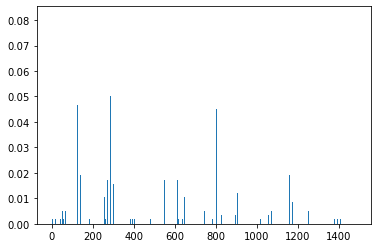

In [25]:
plt.bar(range(len(loyal_recommeds[0,:])), loyal_recommeds[0,:], width=2)

# Small Test

In [26]:
test_df = pd.read_csv(data_path + 'test_data.csv', dtype=str)
test_df

,requestID,userID,date,time,sequence
0,719708291_1635480753679_2960,1439416582,20211029,12,509057416;133681226775;509178914;509178914;508...
1,679978594_1635491281923_1780,1359957188,20211029,15,508829941;133686019323;508830405;133677444707;...
2,781051348_1635478916952_3923,1562102696,20211029,11,508920410;133682604510;508823743;133679506759;...
3,1223262997_1635514428746_6191,2446525994,20211029,21,509263836;133677339412;509255912;133666460363;...
4,1210159908_1635487197871_9372,2420319816,20211029,13,509051208;133686479202;509321576;133685566011;...
...,...,...,...,...,...
99995,1103019431_1635488217052_1566,2206038862,20211029,14,508202927;133667442521;508448933;507727992;133...
99996,819379240_1635440341187_834,1638758480,20211029,00,133680499794;133686284672;133680414545;5089725...
99997,725125338_1635454468857_6210,1450250676,20211029,04,509051208;133664849798;133686913039;508948985;...
99998,1220982835_1635495707014_791,2441965670,20211029,16,133684769217;507767581;507912030;133684439797;...


In [27]:
len(test_df.userID)

100000

In [28]:
len(set(test_df.userID))

71595

In [29]:
for _ in tqdm.tqdm(range(len(test_df))):
    temp_recommeds = np.zeros(len(contentTC2ID))
    for itemID in test_df.loc[_, 'sequence'].split(';'):
        contentIdx = contentID2idx[itemID]
        temp_recommeds[contentIdx] += 1
    sum_temp_recommeds = np.sum(temp_recommeds)
    temp_recommeds /= sum_temp_recommeds
    loyal_idx = np.argmax(np.matmul(loyal_recommeds, temp_recommeds))
    norm_idx = loyalIdx2norm[loyal_idx]
    break

  0%|          | 0/100000 [00:00<?, ?it/s]


In [30]:
test_df.loc[_, 'userID']

'1439416582'

In [31]:
loyal_idx

4856

In [32]:
norm_idx = str(loyalIdx2norm[loyal_idx]).zfill(7)
norm_idx

'0021250'

In [33]:
userIdx2ID[norm_idx]

'1376133776'

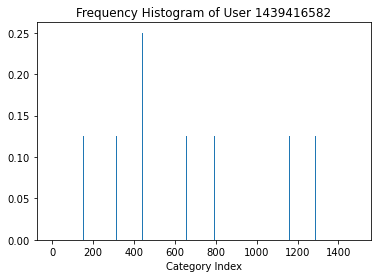

In [34]:
title = 'Frequency Histogram of User {}'.format(test_df.loc[_, 'userID'])
plt.bar(range(len(temp_recommeds)), temp_recommeds, width=5)
plt.title(title)
plt.xlabel('Category Index')
plt.savefig('images/{}.png'.format(title))

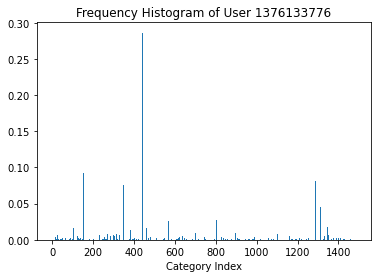

In [35]:
title = 'Frequency Histogram of User {}'.format(userIdx2ID[norm_idx])
plt.bar(range(len(loyal_recommeds[loyal_idx,:])), loyal_recommeds[loyal_idx,:], width=5)
plt.title(title)
plt.xlabel('Category Index')
plt.savefig('images/{}.png'.format(title))